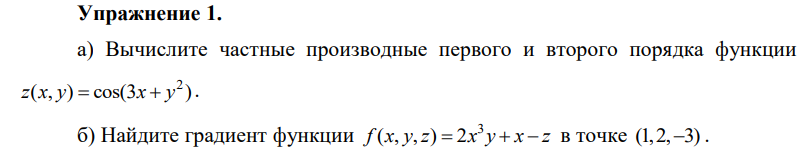

In [13]:
import sympy as sp
#a)
x, y = sp.symbols('x y')
z = sp.cos(3*x+y**2)
print("Частная производная 1 порядка: ")
print('dzdx:') #1 производная по х
dzdx = sp.pprint(sp.diff(z, x))
print('\ndzdy:') #1 производная по у
dzdy = sp.pprint(sp.diff(z, y))

print("Частная производная 2 порядка: ")
print('\nd2zdx2:') #2 производная по х
d2zdx2 = sp.pprint(sp.diff(z, x, 2))
print('\nd2zdy2:') #2 производная по х
d2zdy2 = sp.pprint(sp.diff(z, y, 2))
print('\nd2zdxdy:') #производная по x, у
d2zdxdy = sp.pprint(sp.diff(sp.diff(z, x), y))

#b)
print('Gradient:') 
x, y, z = sp.symbols('x y z')
f = 2*x**3*y+x-z
print('dfdx:') 
sp.pprint(sp.diff(f, x))
print('\ndfdy:')
sp.pprint(sp.diff(f, y))
print('\ndfdz:') 
sp.pprint(sp.diff(f, y))


Частная производная 1 порядка: 
dzdx:
      ⎛       2⎞
-3⋅sin⎝3⋅x + y ⎠

dzdy:
        ⎛       2⎞
-2⋅y⋅sin⎝3⋅x + y ⎠
Частная производная 2 порядка: 

d2zdx2:
      ⎛       2⎞
-9⋅cos⎝3⋅x + y ⎠

d2zdy2:
   ⎛   2    ⎛       2⎞      ⎛       2⎞⎞
-2⋅⎝2⋅y ⋅cos⎝3⋅x + y ⎠ + sin⎝3⋅x + y ⎠⎠

d2zdxdy:
        ⎛       2⎞
-6⋅y⋅cos⎝3⋅x + y ⎠
Gradient:
dfdx:
   2      
6⋅x ⋅y + 1

dfdy:
   3
2⋅x 

dfdz:
   3
2⋅x 


In [9]:
i, j, k = sp.symbols('i j k') #1,2,-3
g = (6*1*2+1)*i+(2*1**3)*j+(-1)*k
print('gradient:', g) 

gradient: 13*i + 2*j - k


In [3]:
r, t = sp.symbols('r t')
# формулы перехода от декартовой системы координат к полярной
x = r * sp.cos(t)
y = r * sp.sin(t)
# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y]])
sp.pprint(A)

[r⋅cos(t)  r⋅sin(t)]


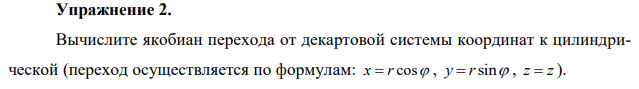

In [5]:
r, t = sp.symbols('r t')
# формулы перехода от декартовой системы координат к полярной
x = r * sp.cos(t)
y = r * sp.sin(t)
z = z
# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y, z]])
sp.pprint(A)
print("\n")
B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)], [sp.diff(A,z)]])
sp.pprint(B.T)
print("\n")
# вычисление якобиана
sp.pprint(B.det())
sp.pprint(sp.simplify(B.det())) # упрощение выражения с помощью simplify

[r⋅cos(t)  r⋅sin(t)  z]


⎡cos(t)  -r⋅sin(t)  0⎤
⎢                    ⎥
⎢sin(t)  r⋅cos(t)   0⎥
⎢                    ⎥
⎣  0         0      1⎦


     2           2   
r⋅sin (t) + r⋅cos (t)
r


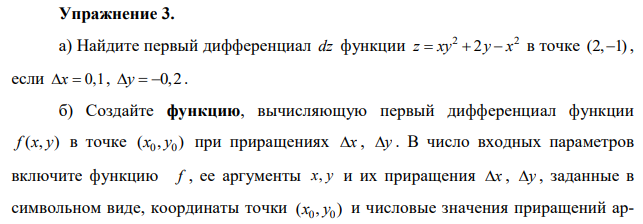

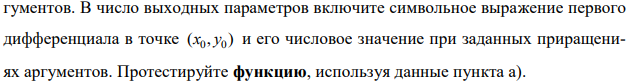


In [18]:
x, y, z, sdx, sdy = sp.symbols('x y z sdx sdy')
print("Частная производная 1 порядка: ")

def d1(z, x, y, dx, dy, x0, y0, sdx, sdy):
    dzdx =sp.diff(z, x)
    dzdy = sp.diff(z, y)
    
    D = dzdx*x0+dzdy*y0
    sp.pprint(D)
    a1 = D.subs(x, x0)
    a2 = a1.subs(y, y0)
    a3 = a2.subs(dzdx, x0)
    a4 = a3.subs(dzdy, y0)
    sp.pprint(a4)
    
z = x*y**2+2*y-x**2
d1(z, x, y, 0.1, -0.2, 2, -1, sdx,sdy)    

Частная производная 1 порядка: 
                  2    
-2⋅x⋅y - 4⋅x + 2⋅y  - 2
-4


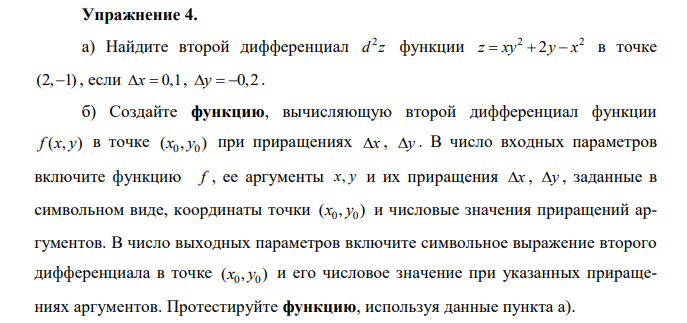

In [21]:
x, y, z, sdx2, sdy2 = sp.symbols('x y z sdx2 sdy2')
print("Частная производная 2 порядка: ")

def d2(z, x, y, dx, dy, x0, y0, sdx2, sdy2):
    dzdx =sp.diff(z, x)
    dzdy = sp.diff(z, y)
    d2zdx2 = sp.diff(z, x, 2)
    d2zdy2 = sp.diff(z, y, 2)
    d2zdxdy = sp.diff(z, x, 2)
    d2zdxdy = sp.diff(sp.diff(z, x), y)
    D = d2zdx2*x0+2*d2zdxdy+d2zdy2*y0
    sp.pprint(D)
    a1 = D.subs(x, x0)
    a2 = a1.subs(y, y0)
    a3 = a2.subs(dzdx, x0)
    a4 = a3.subs(dzdy, y0)
    sp.pprint(a4)
    
z = x*y**2+2*y-x**2
d2(z, x, y, 0.1, -0.2, 2, -1, sdx2, sdy2)    

Частная производная 2 порядка: 
-2⋅x + 4⋅y - 4
-12


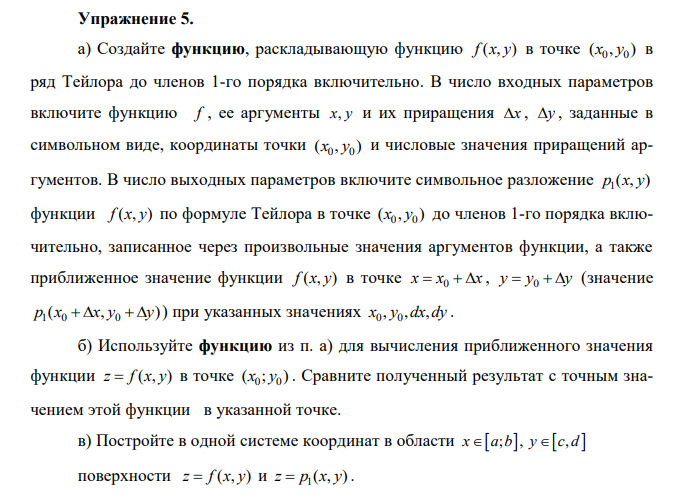

In [28]:
x, y, sdx, sdy = sp.symbols('x y sdx sdy')
print("Тейлор, 1 порядок: ")

def d3(f, x, y, dx, dy, x0, y0, sdx, sdy):
    dzdx =sp.diff(f, x)
    dzdy = sp.diff(f, y)
    
    D = dzdx*x0+dzdy*y0
    sp.pprint(D)
    a1 = D.subs(x, x0)
    a2 = a1.subs(y, y0)
    a3 = a2.subs(dzdx, x0)
    a4 = a3.subs(dzdy, y0)
    return D
    
f = sp.exp(x-y)*(x**2-2*y**2)
d3(f, x, y, 0.1, -0.2, 2.8, -2.8, sdx,sdy)    





Частная производная 1 порядка: 
       x - y           x - y       ⎛ 2      2⎞  x - y
5.6⋅x⋅ℯ      + 11.2⋅y⋅ℯ      + 5.6⋅⎝x  - 2⋅y ⎠⋅ℯ     


5.6*x*exp(x - y) + 11.2*y*exp(x - y) + 5.6*(x**2 - 2*y**2)*exp(x - y)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
xs = np.linspace(-6, 6, 100)
ys = np.linspace(6, 6, 100)
X, Y = np.meshgrid(xs,ys)

Z = np.exp(X-Y)*(X**2-2*Y**2)
ax.plot_wireframe(X,Y,Z,rstride = 2, cstride = 2)
surf = ax.plot_surface(X,Y,Z,cmap=cm.plasma, linewidth = 0)
#color
fig.colorbar(surf, shrink=1, aspect=10)
f = sp.exp(x-y)*(x**2-2*y**2)
f1=sp.diff(f, x)
f2=sp.diff(f, y)
f = f.subs(x, 2.8)
f = f.subs(y, -2.8)
f1 = f1.subs(x, 2.8)
f1 = f1.subs(y, -2.8)
f2 = f2.subs(x, 2.8)
f2 = f2.subs(y, -2.8)
print(f,f1,f2)
Z1=-2120-605*(X-2.8)+5148*(Y+2.8)
ax.plot_wireframe(X,Y,Z1,rstride = 2, cstride = 2)
surf = ax.plot_surface(X,Y,Z1,cmap=cm.plasma, linewidth = 10)
fig.colorbar(surf, shrink = 0.5, aspect = 5)


plt.show()

-2120.14303422104 -605.755152634581 5148.91879739394


In [31]:
f = sp.exp(x-y)*(x**2-2*y**2)
f1=sp.diff(f, x, 2)
f2=sp.diff(f, y, 2)
f3=sp.diff(sp.diff(x, y), y)
f1 = f1.subs(x, 2.8)
f1 = f1.subs(y, -2.8)
f2 = f2.subs(x, 2.8)
f2 = f2.subs(y, -2.8)
f3 = f3.subs(x, 2.8)
f3 = f3.subs(y, -2.8)
print(f1,f2,f3)

1449.48554380418 -9259.40019027146 0


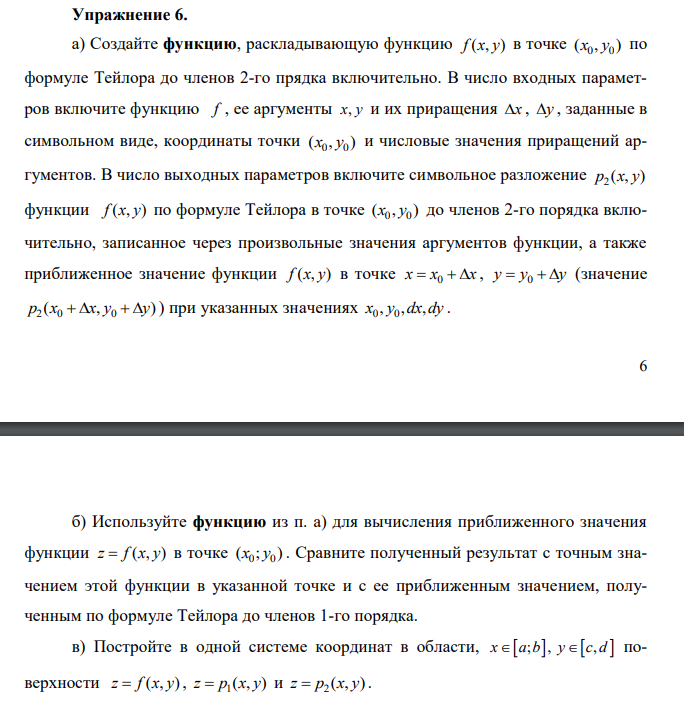

In [29]:
x, y, sdx, sdy = sp.symbols('x y sdx sdy')
print("Тейлор, 2 порядок: ")

def d4(f, x, y, dx, dy, x0, y0, sdx2, sdy2):
    dzdx =sp.diff(f, x)
    dzdy = sp.diff(f, y)
    d2zdx2 = sp.diff(f, x, 2)
    d2zdy2 = sp.diff(f, y, 2)
    d2zdxdy = sp.diff(f, x, 2)
    d2zdxdy = sp.diff(sp.diff(f, x), y)
    D = d2zdx2*x0+2*d2zdxdy+d2zdy2*y0
    sp.pprint(D)
    a1 = D.subs(x, x0)
    a2 = a1.subs(y, y0)
    a3 = a2.subs(dzdx, x0)
    a4 = a3.subs(dzdy, y0)
    
    return D
    
f = sp.exp(x-y)*(x**2-2*y**2)
d4(f, x, y, 0.1, -0.2, 2.8, -2.8, sdx2,sdy2) 

Тейлор, 2 порядок: 
       x - y        x - y     ⎛ 2      2⎞  x - y       ⎛ 2            2    ⎞  
- 4⋅x⋅ℯ      - 8⋅y⋅ℯ      - 2⋅⎝x  - 2⋅y ⎠⋅ℯ      + 2.8⋅⎝x  + 4⋅x - 2⋅y  + 2⎠⋅ℯ

x - y       ⎛ 2      2          ⎞  x - y
      - 2.8⋅⎝x  - 2⋅y  + 8⋅y - 4⎠⋅ℯ     


-4*x*exp(x - y) - 8*y*exp(x - y) - 2*(x**2 - 2*y**2)*exp(x - y) + 2.8*(x**2 + 4*x - 2*y**2 + 2)*exp(x - y) - 2.8*(x**2 - 2*y**2 + 8*y - 4)*exp(x - y)

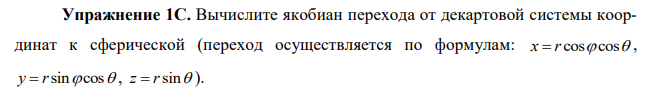

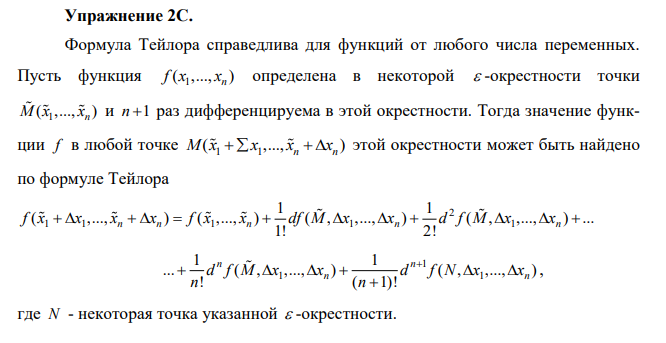

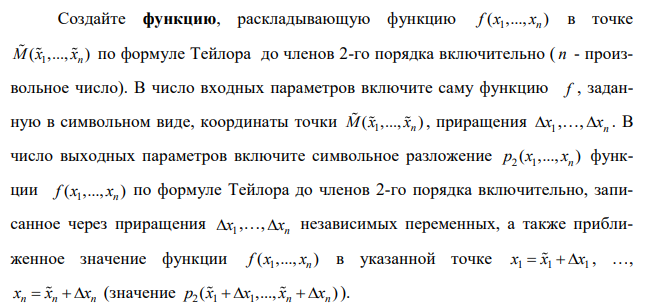